## 2. Idices and Exploration
We define normalised hourly, daily, and monthly indices to compare bicycle traffic patterns across stations and explore their temporal variability prior to clustering.

## Indices
To compare station behaviour across different temporal scales, we use normalized indices on hourly, daily, and monthly levels. Normalisation ensures that stations with different absolute traffic volumes remain comparable.

To illustrate the output of each index, we use an arbitrary bicycle counting station in Heidelberg

In [18]:
from data_io.loader.data_loader import DataLoader
from analysis.characterisation.notebooks.notebook_config import dl

station = dl.get_bicyle_stations()[0]

**Daily Mean Count**

The daily mean count $\bar{C}_{24h}$ is defined as the total daily traffic divided by the number of observed days.

In [19]:
from analysis.characterisation.indices import daily_mean_count

daily_mean_count(loader=dl, station_name=station)

832.6738987508219

**Hourly index**

The hourly index measures the relative traffic intensity of each hour compared to the daily mean:

$$
\begin{align*}
I_{h} = \frac{\bar{C}_{1h}}{\bar{C}_{24h}}
\end{align*}
$$

This highlights typical diurnal patterns, such as low night-time counts and increased traffic during morning and evening hours.

In [20]:
from analysis.characterisation.indices import hourly_index

hourly_index(loader=dl, station_name=station, channel="channels_all")

hour,mean_C_1h,I_h
i8,f64,f64
0,2.311295,0.002776
1,1.376812,0.001653
2,1.230716,0.001478
3,3.621733,0.00435
4,13.066116,0.015692
…,…,…
19,20.948489,0.025158
20,14.528846,0.017448
21,10.199039,0.012249


**Daily Index**

The daily index captures day-to-day variability, normalised by the overall daily mean:

$$
\begin{align*}
I_{d} = \frac{\bar{C}_{1d}}{\bar{C}_{24h}}
\end{align*}
$$

In [21]:
from analysis.characterisation.indices import daily_index

daily_index(loader=dl, station_name=station, channel="channels_all")

weekday,mean_C_1d,I_d
i8,f64,f64
1,909.126761,1.091816
2,927.917051,1.114382
3,920.643836,1.105648
4,918.142857,1.102644
5,865.590909,1.039532
6,664.83105,0.798429
7,623.189815,0.74842


**Monthly Index**

The monthly index reflects seasonal variation by comparing average monthly traffic to the daily mean:
$$
\begin{align*}
I_{m} = \frac{\bar{C}_{30d}}{\bar{C}_{24h}}
\end{align*}
$$

In [22]:
from analysis.characterisation.indices import monthly_index

monthly_index(loader=dl, station_name=station, channel="channels_all")

month,mean_C_1d,I_m
i8,f64,f64
1,500.373737,0.600924
2,590.394366,0.709034
3,741.96129,0.891059
4,874.904459,1.050717
5,1007.705036,1.210204
…,…,…
8,960.552,1.153575
9,952.641509,1.144075
10,789.792,0.948501


## Exploratory Plots

Before clustering, we visually explore the temporal patterns of all stations using normalized indices.

**Hourly Indices**

The aggregated hourly indices illustrate a clear contrast between weekdays and weekends on average: weekdays exhibit a pronounced double-peak structure, while weekend profiles are flatter and more evenly distributed. However, the semi-transparent individual curves already indicate substantial variability across stations.

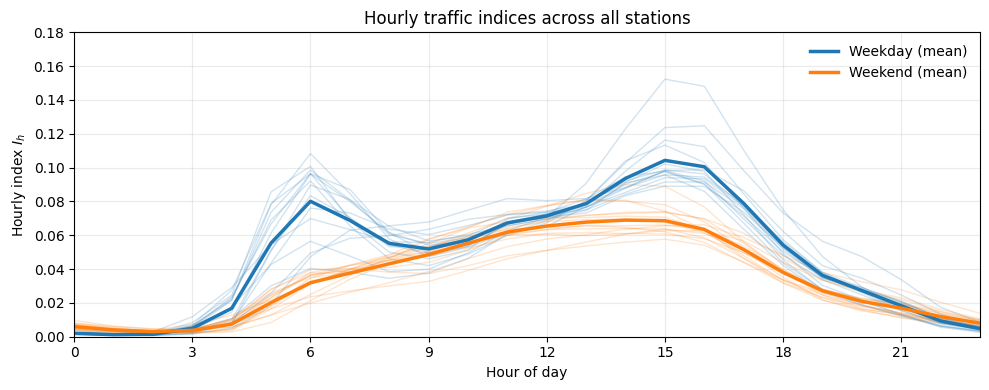

In [23]:
from analysis.characterisation.plotting import plot_hourly_indices_all

plot_hourly_indices_all(dl, alpha=0.2, grid_alpha=0.25, ylim=(0, 0.18), save=False)


We next inspect hourly profiles on a per-station basis. These plots reveal that several stations deviate from the canonical utilitarian or recreational patterns. Examples include stations with a single dominant peak, shifted peak times, or only minor differences between weekday and weekend profiles.

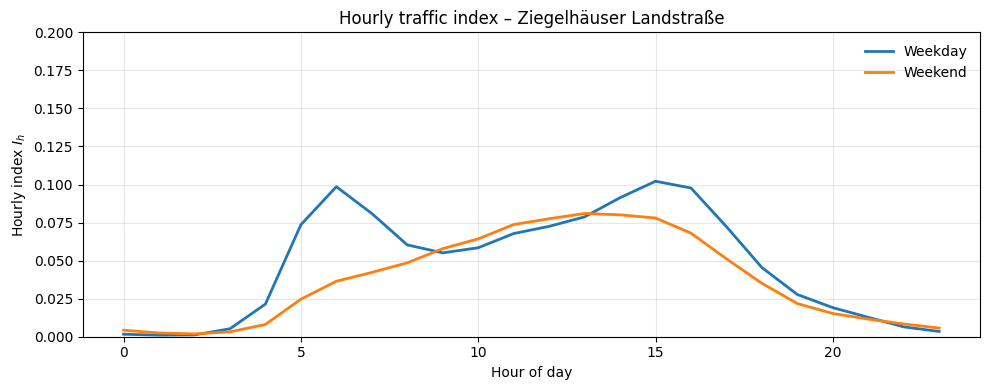

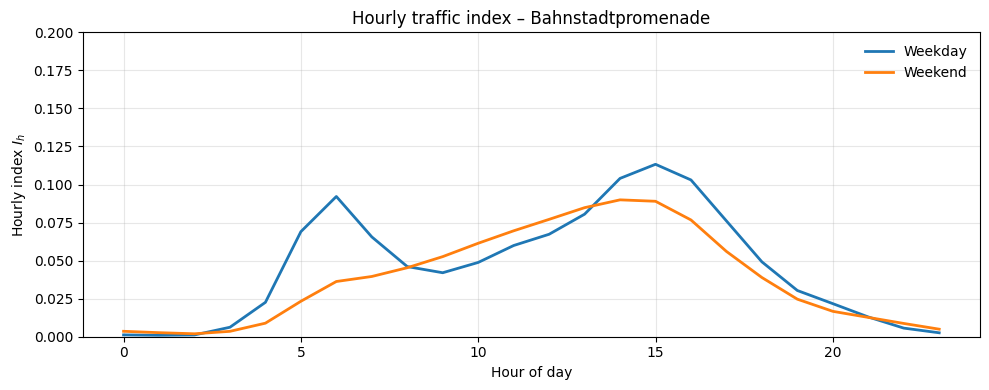

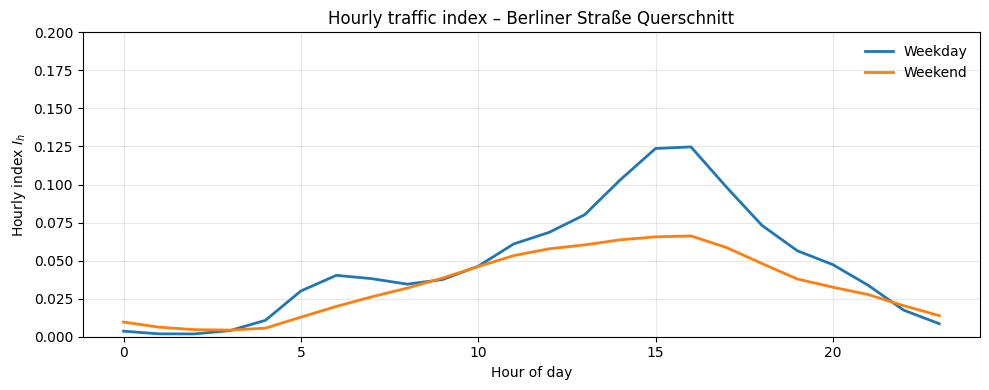

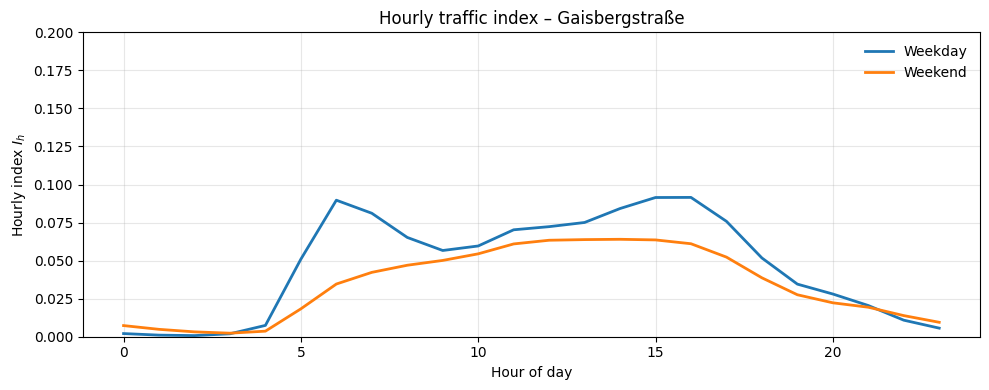

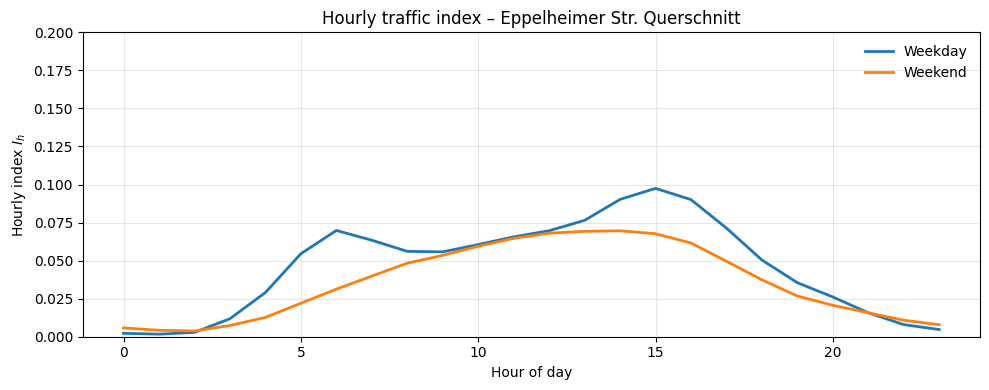

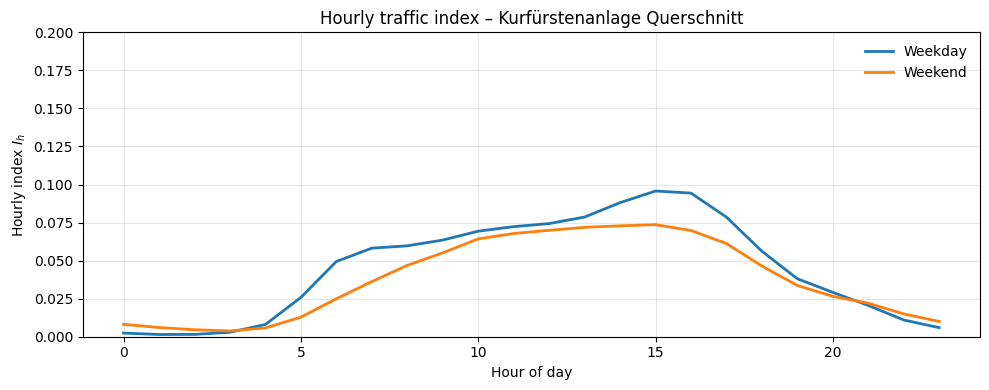

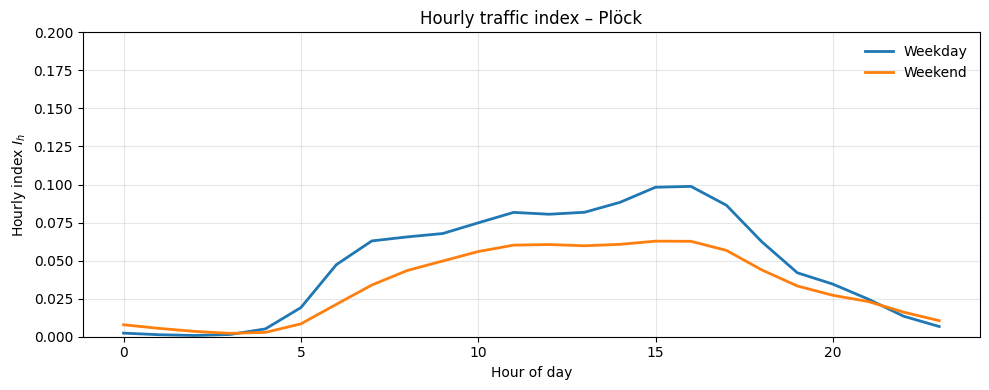

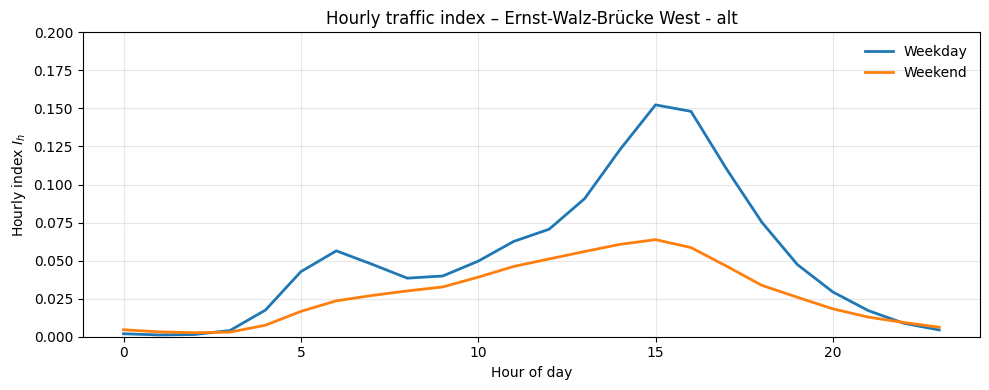

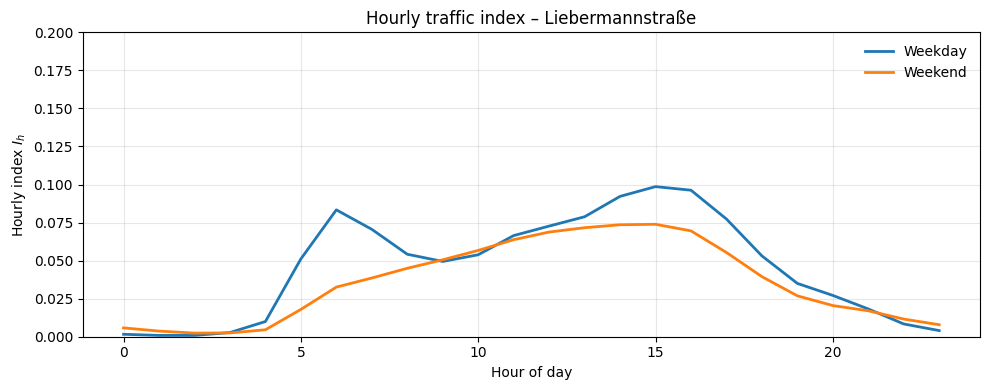

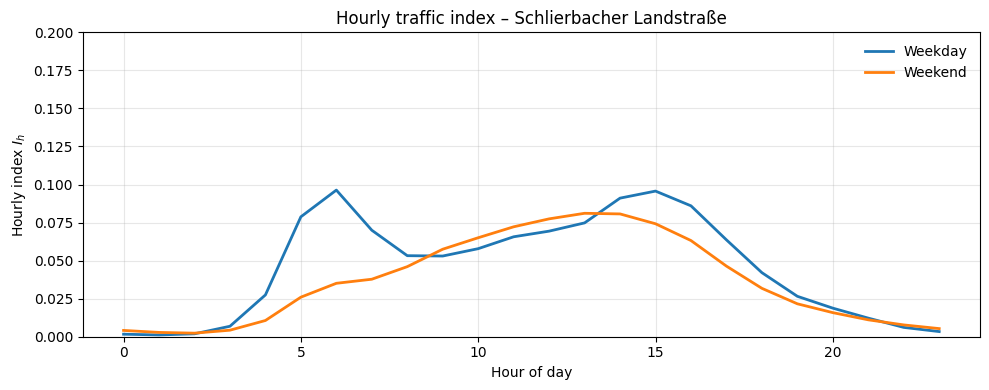

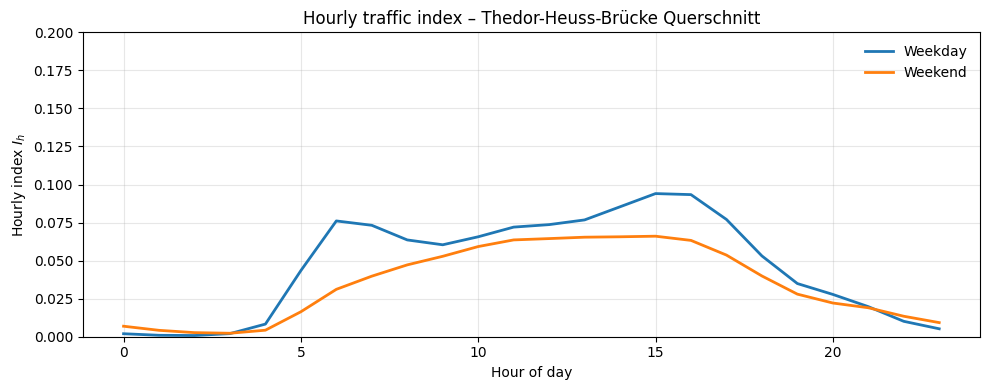

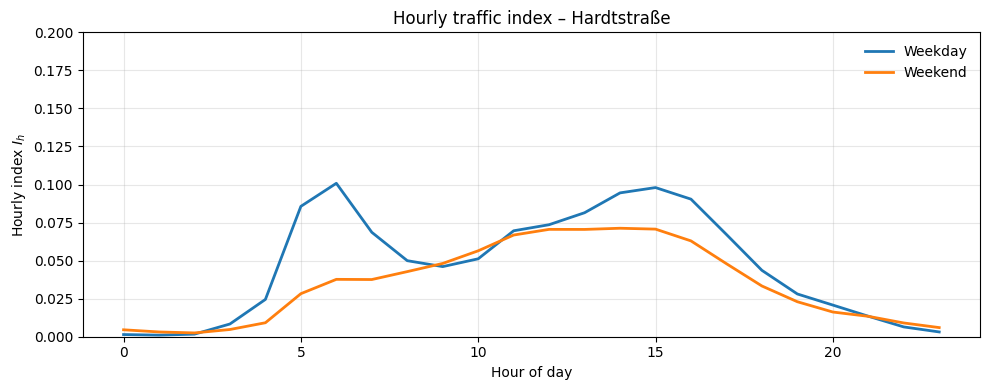

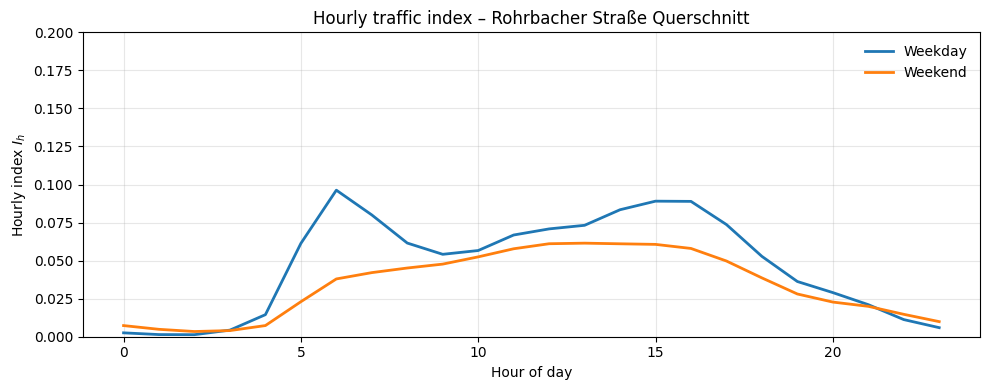

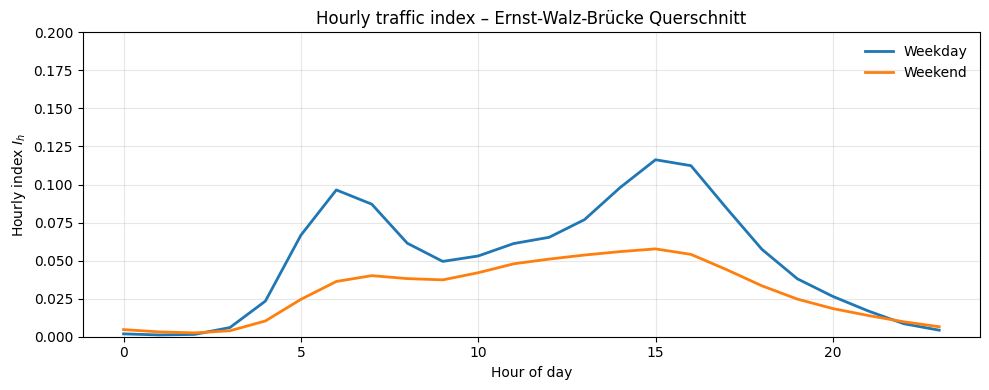

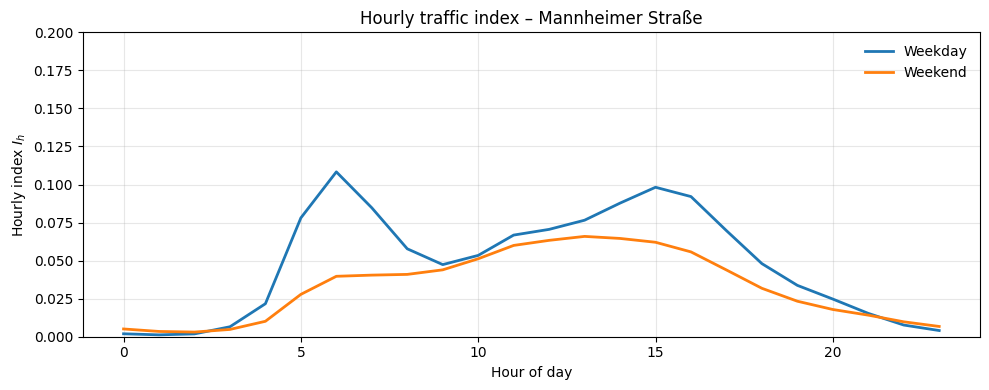

In [24]:
from analysis.characterisation.plotting import plot_hourly_indices

for station in dl.get_bicyle_stations():
  plot_hourly_indices(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2), show_metrics=False)

**Daily Indices**

Daily indices show a clear reduction in traffic on weekends. However, the magnitude of this drop varies substantially between stations, potentially providing an additional discriminator between recreational and utilitarian usage.

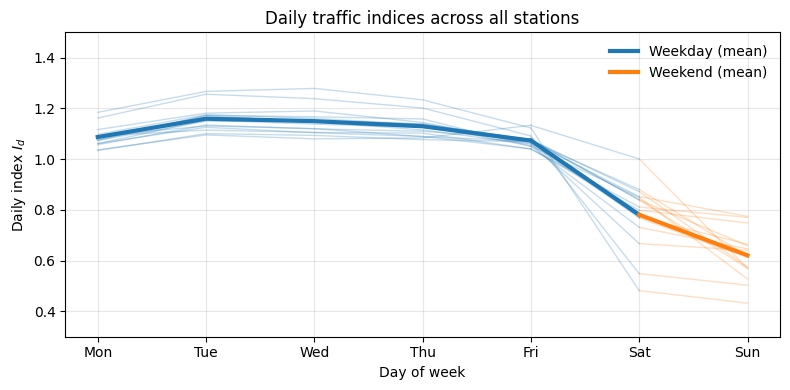

In [25]:
from analysis.characterisation.plotting import plot_daily_indices_all

plot_daily_indices_all(dl)

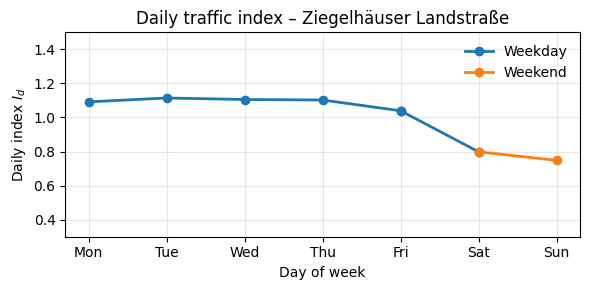

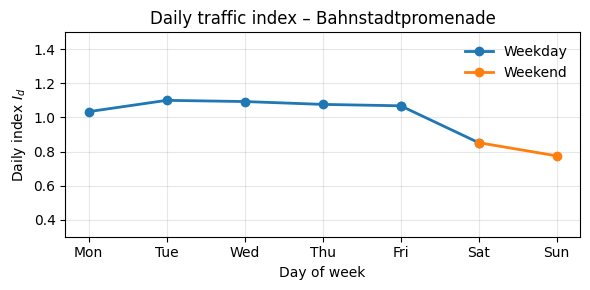

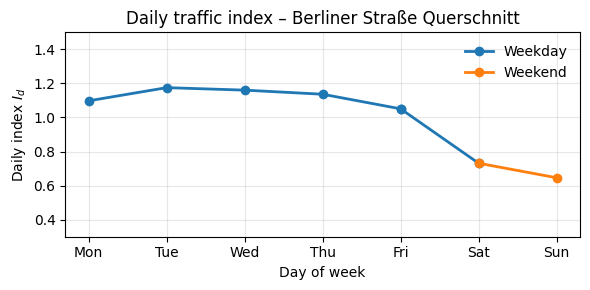

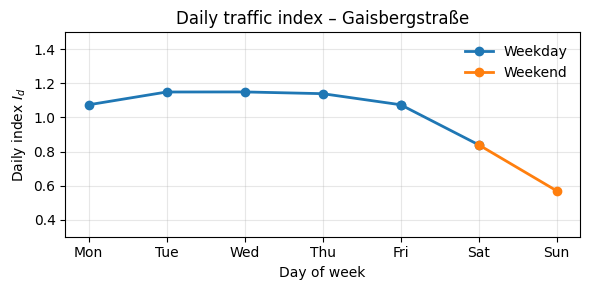

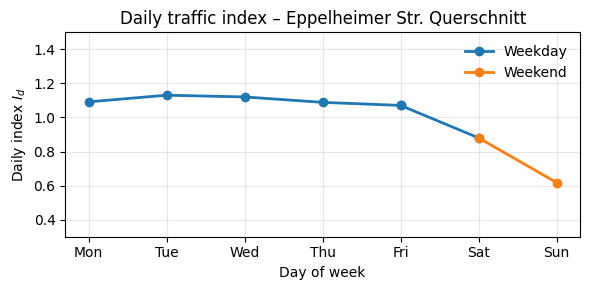

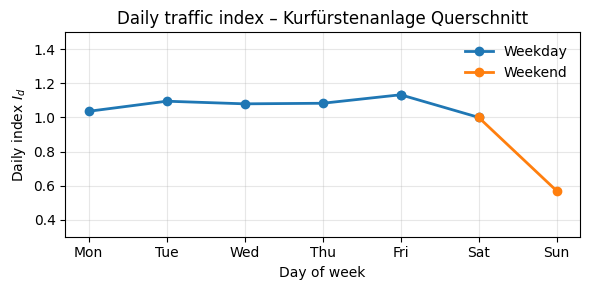

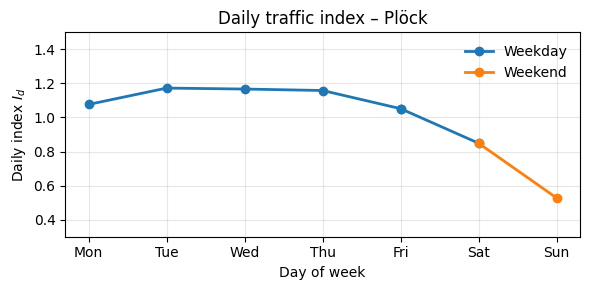

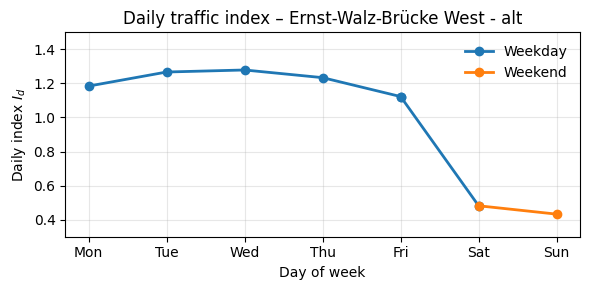

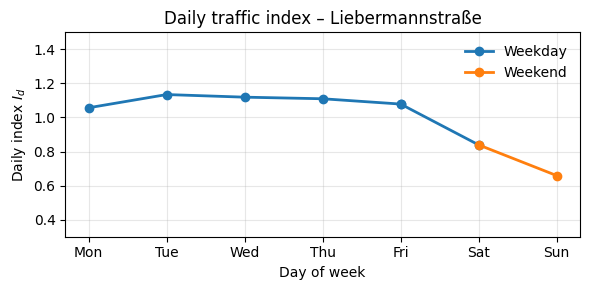

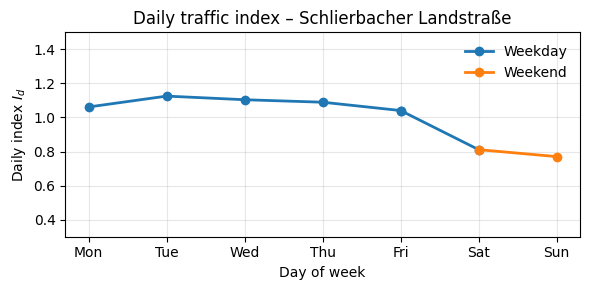

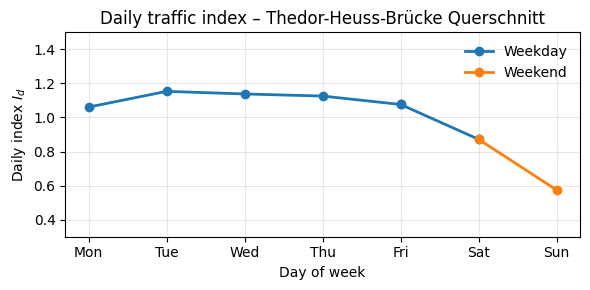

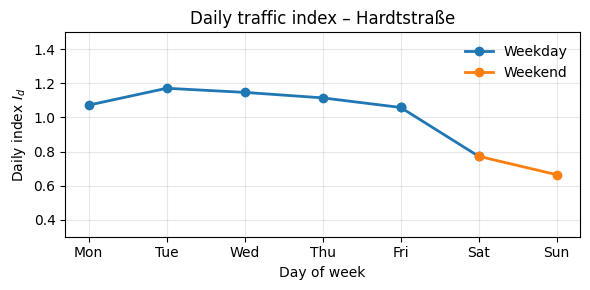

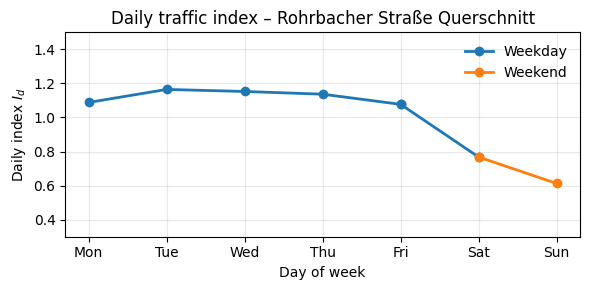

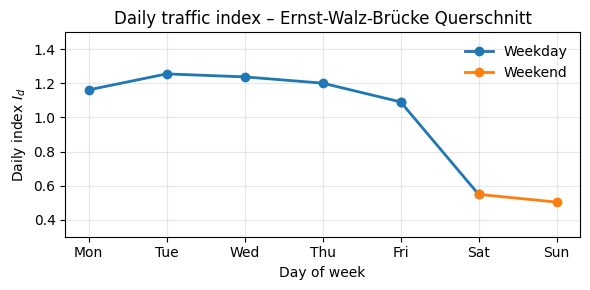

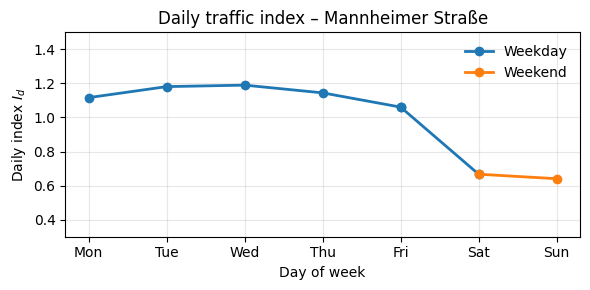

In [26]:
from analysis.characterisation.plotting import plot_daily_indices

for s in dl.get_bicyle_stations():
    plot_daily_indices(dl, s, ylim=(0.3,1.5), show_metric=False)

**Monthly Indices**

Monthly indices reveal clear differences in seasonality across stations. While all stations exhibit a noticeable reduction in usage during winter, some show an especially pronounced drop, which may indicate predominantly recreational usage. In contrast, other stations maintain relatively stable traffic levels throughout the year, consistent with mainly utilitarian travel patterns.

Notably, a pronounced decrease in traffic is observed in August, which may be explained by the summer holiday period, during which regular commuting activity is reduced.

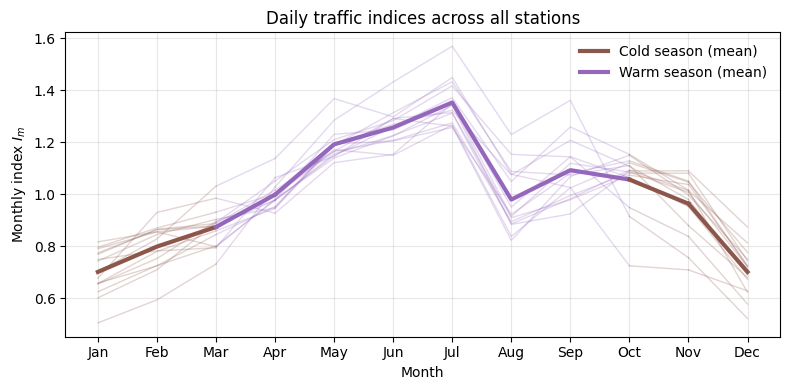

In [27]:
from analysis.characterisation.plotting import plot_monthly_indices_all

plot_monthly_indices_all(dl)

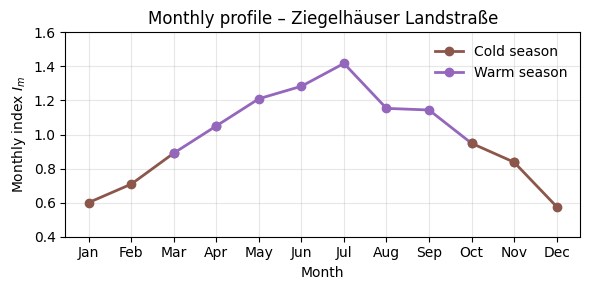

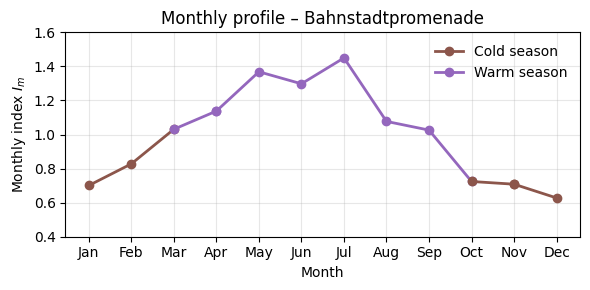

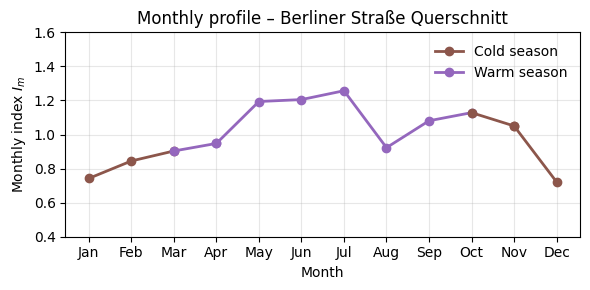

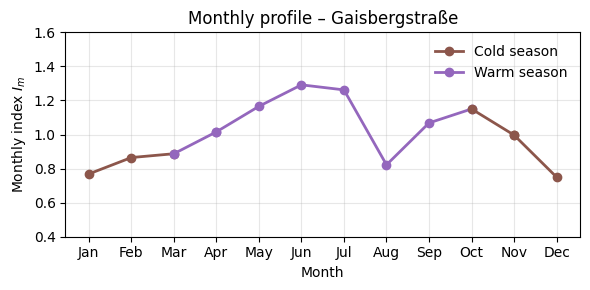

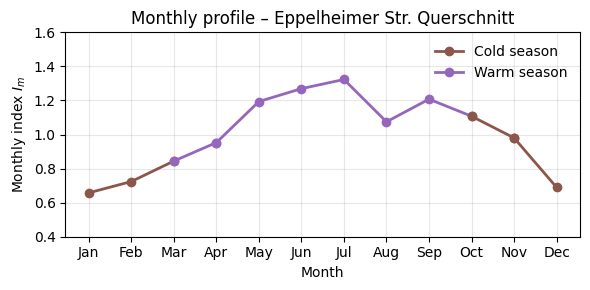

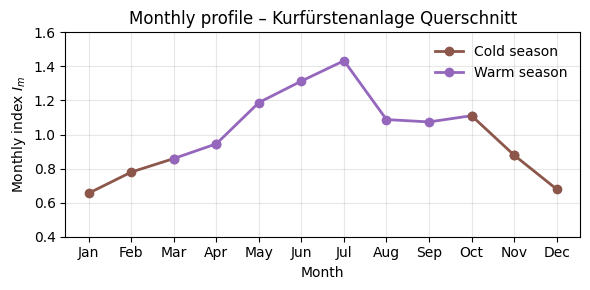

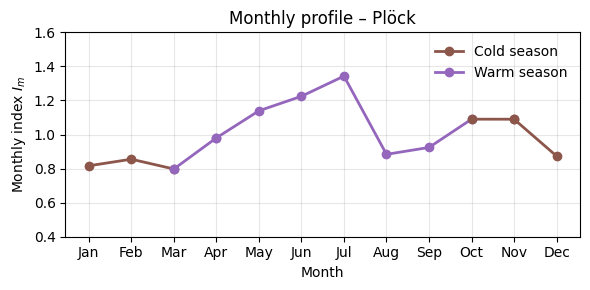

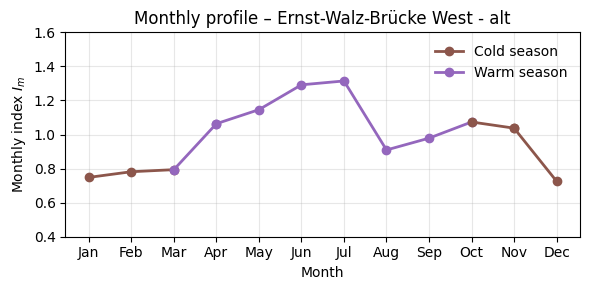

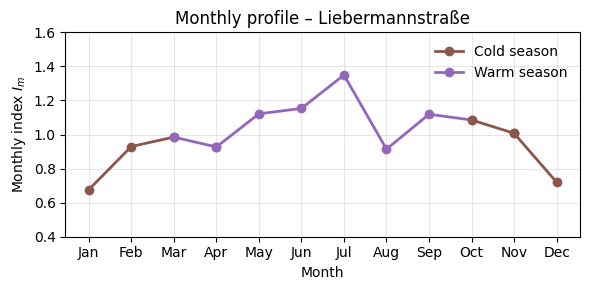

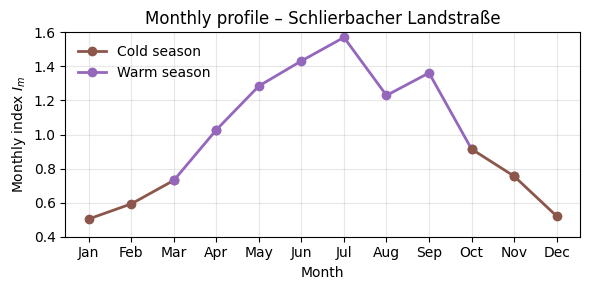

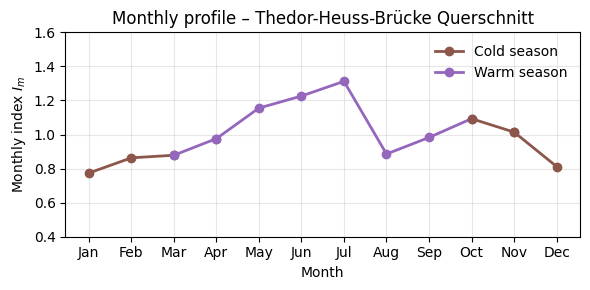

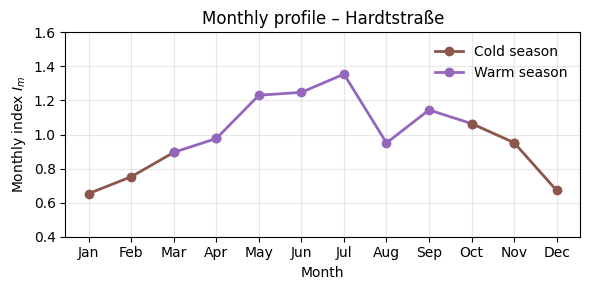

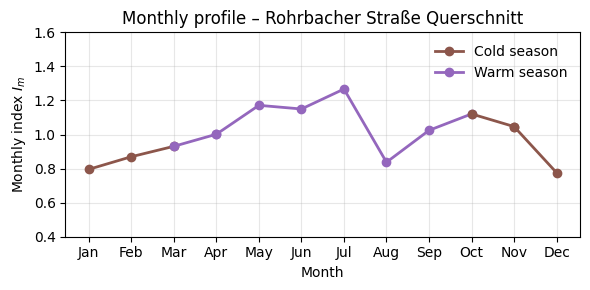

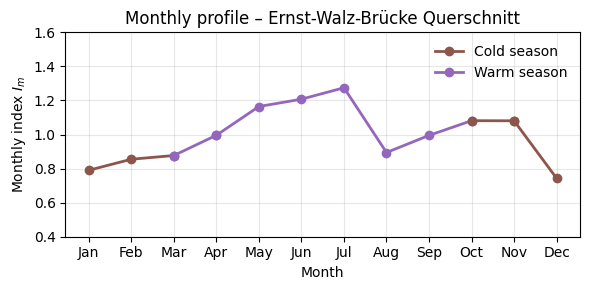

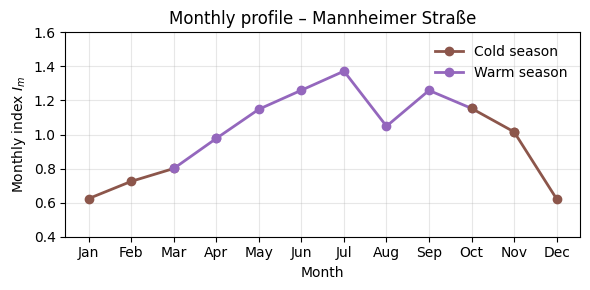

In [28]:
from analysis.characterisation.plotting import plot_monthly_indices

for s in dl.get_bicyle_stations():
    plot_monthly_indices(dl, s, ylim=(0.4, 1.6), show_metric=False)